In [1]:
%pylab inline

import os
os.chdir('..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
goldset_filenames = !find data -name 'changes-file-goldset.csv'
goldset_filenames

['data/mahout/v0.10.0/changes-file-goldset.csv',
 'data/tika/v1.8/changes-file-goldset.csv',
 'data/pig/v0.14.0/changes-file-goldset.csv',
 'data/openjpa/v2.3.0/changes-file-goldset.csv',
 'data/bookkeeper/v4.3.0/changes-file-goldset.csv',
 'data/zookeeper/v3.5.0/changes-file-goldset.csv']

In [3]:
import os.path
from collections import defaultdict
from tse.changes import *
from tse.history import get_project_name

In [4]:
projects = defaultdict(dict)
for filename in goldset_filenames:
    project_name = get_project_name(filename)
    projects[project_name]['log_filename'] = os.path.join('data', project_name, 'changes-file.log.gz')
    projects[project_name]['goldset_filename'] = filename
projects

defaultdict(dict,
            {'bookkeeper': {'goldset_filename': 'data/bookkeeper/v4.3.0/changes-file-goldset.csv',
              'log_filename': 'data/bookkeeper/changes-file.log.gz'},
             'mahout': {'goldset_filename': 'data/mahout/v0.10.0/changes-file-goldset.csv',
              'log_filename': 'data/mahout/changes-file.log.gz'},
             'openjpa': {'goldset_filename': 'data/openjpa/v2.3.0/changes-file-goldset.csv',
              'log_filename': 'data/openjpa/changes-file.log.gz'},
             'pig': {'goldset_filename': 'data/pig/v0.14.0/changes-file-goldset.csv',
              'log_filename': 'data/pig/changes-file.log.gz'},
             'tika': {'goldset_filename': 'data/tika/v1.8/changes-file-goldset.csv',
              'log_filename': 'data/tika/changes-file.log.gz'},
             'zookeeper': {'goldset_filename': 'data/zookeeper/v3.5.0/changes-file-goldset.csv',
              'log_filename': 'data/zookeeper/changes-file.log.gz'}})

In [5]:
for project_name, project in projects.items():
    raw_commits = list(get_raw_commits(project['log_filename']))
    project['developers'] = get_developers(raw_commits)
    project['commits'] = get_commits(raw_commits, project['developers'])
    project['goldset'] = get_shas(project['goldset_filename'])
    project['developer2sha'] = defaultdict(set)
    project['developer2goldset'] = defaultdict(set)
    for commit in project['commits']:
        sha = commit.sha
        developer = project['developers'][commit.committer]
        project['developer2sha'][developer].add(sha)
        if sha in project['goldset']:
            project['developer2goldset'][developer].add(sha)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'get_raw_commits' raised StopIteration
  


In [6]:
for project_name, project in projects.items():
    print(project_name)
    print('|developers| =', len(set(project['developers'].values())))
    print('|commits| =', len(project['commits']))
    print('|goldset| =', len(project['goldset']))
    print('|developer2sha| =', len(project['developer2sha']))
    print('|developer2goldset| =', len(project['developer2goldset']))

mahout
|developers| = 34
|commits| = 3327
|goldset| = 218
|developer2sha| = 34
|developer2goldset| = 16
tika
|developers| = 24
|commits| = 2570
|goldset| = 86
|developer2sha| = 24
|developer2goldset| = 12
pig
|developers| = 31
|commits| = 4236
|goldset| = 380
|developer2sha| = 31
|developer2goldset| = 8
openjpa
|developers| = 27
|commits| = 6690
|goldset| = 529
|developer2sha| = 27
|developer2goldset| = 12
bookkeeper
|developers| = 5
|commits| = 778
|goldset| = 244
|developer2sha| = 5
|developer2goldset| = 4
zookeeper
|developers| = 17
|commits| = 1877
|goldset| = 655
|developer2sha| = 17
|developer2goldset| = 11


In [7]:
for project_name, project in projects.items():
    change_involvements = list()
    for developer, shas in project['developer2sha'].items():
        change_involvements.append(len(shas) / len(project['commits']))
    project['change_involvements'] = change_involvements

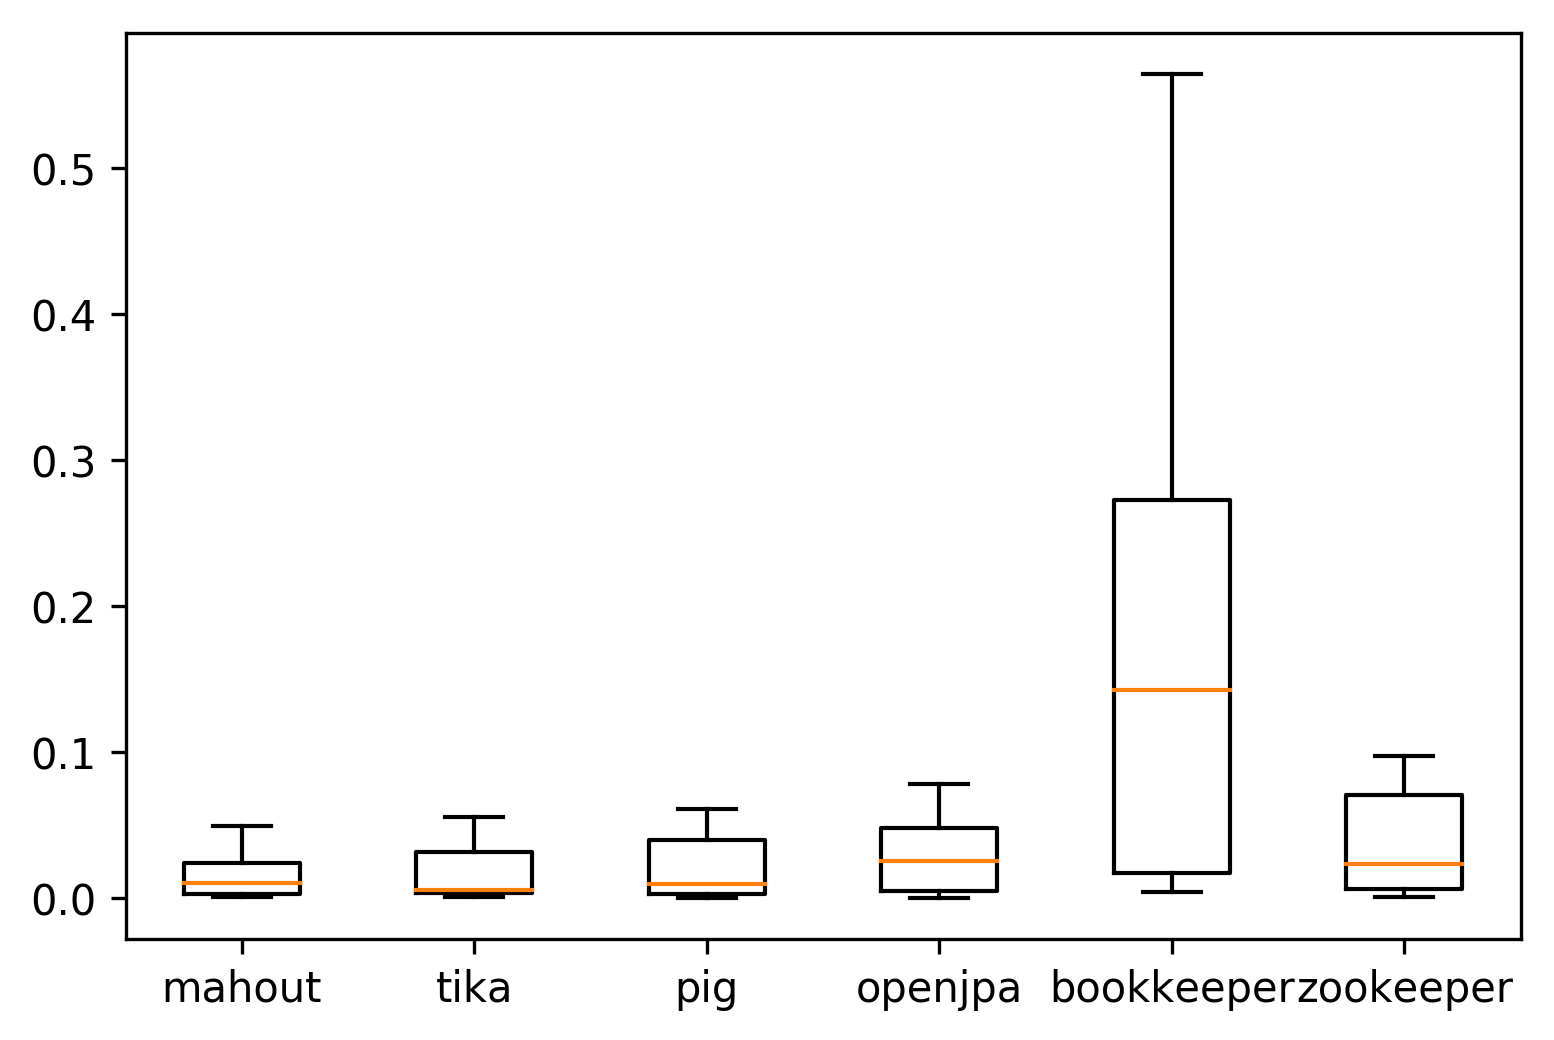

In [8]:
project_names = list(projects.keys())
project_series = list()
for project in projects.values():
    project_series.append(project['change_involvements'])
fig = plt.figure(dpi=300)
fig.gca().boxplot(project_series, labels=project_names, showfliers=False)
plt.show()

In [9]:
for project_name, project in projects.items():
    goldset_involvements = list()
    for developer in project['developer2sha']:
        if developer in project['developer2goldset']:
            goldset_involvements.append(len(project['developer2goldset']) / len(project['goldset']))
        else:
            goldset_involvements.append(0.0)
    project['goldset_involvements'] = goldset_involvements

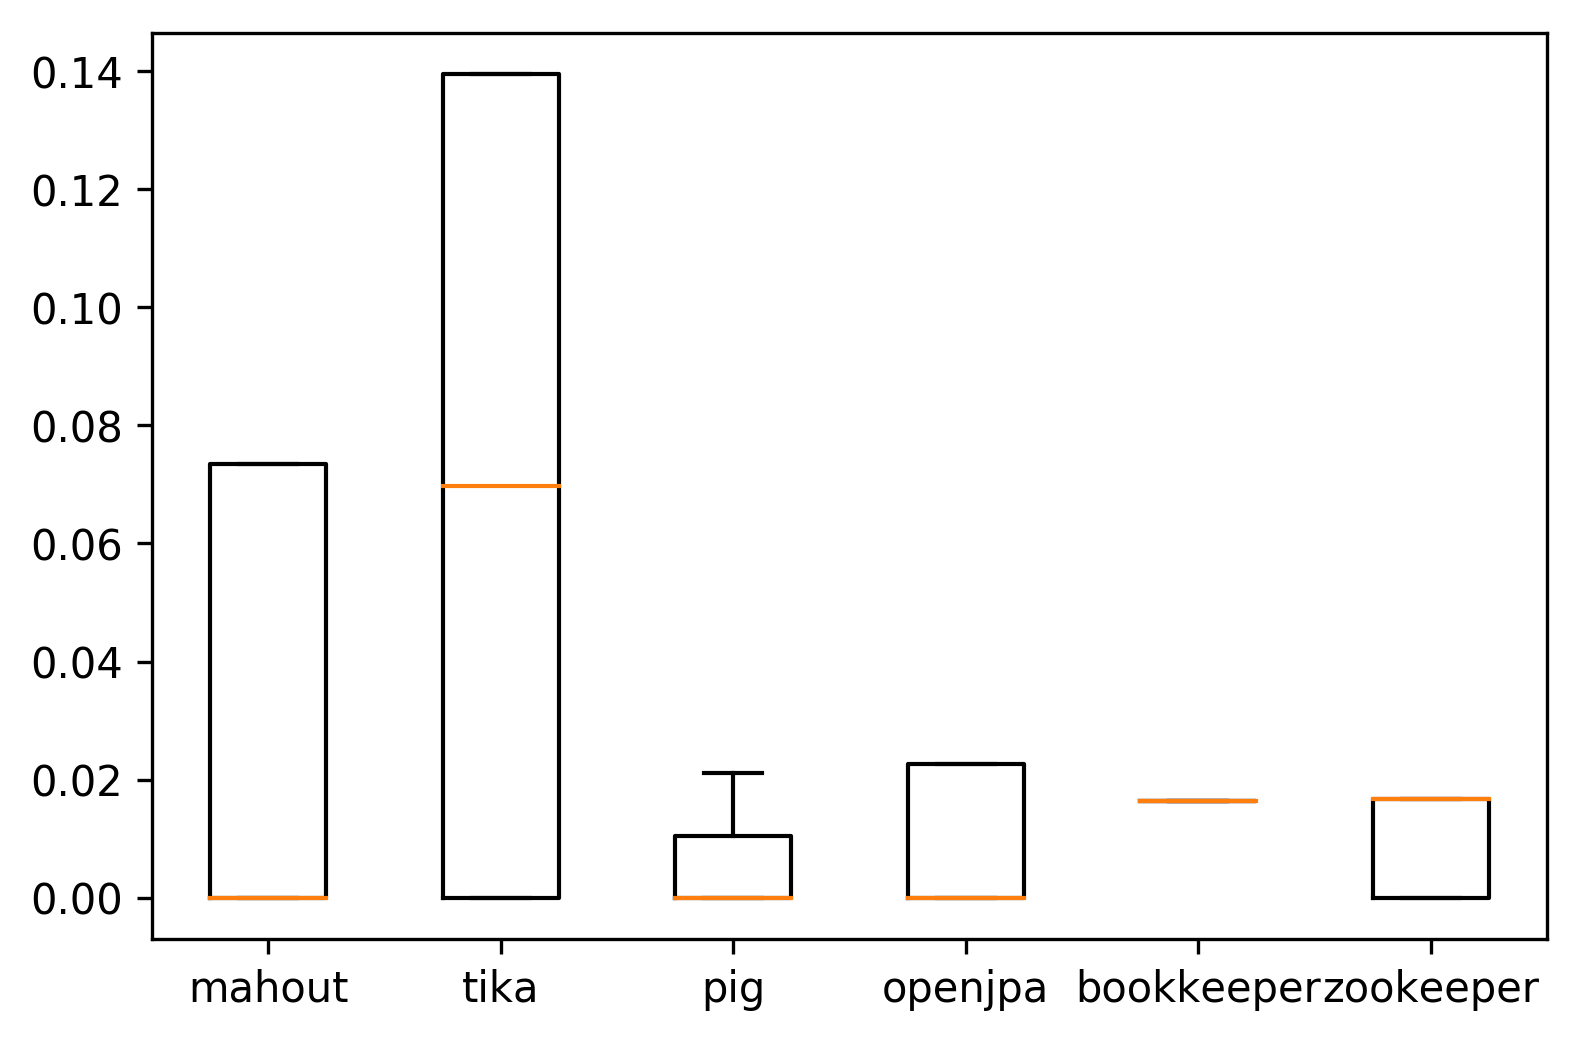

In [10]:
project_names = list(projects.keys())
project_series = list()
for project in projects.values():
    project_series.append(project['goldset_involvements'])
fig = plt.figure(dpi=300)
fig.gca().boxplot(project_series, labels=project_names, showfliers=False)
plt.show()